# Canvas Group #22 *FBGM*
---
## Introduction

We decided to make our metric based off the general safety of the neighborhoods in Pittsburgh. We decided to use these three submetrics:
1. Arrest Data
2. Number of parks
3. Blood-lead levels reported by school district


## We will start with arrest data from Kevin
---

I will start by importing the necessary libraries, and I will then read my *.csv file containing the arrest data that I want to investigate.

---

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
arrest = pd.read_csv("arrest_data.csv", sep=",")

---

Now I will create a dictionary, with which I will iterate through the dataframe to add each neighborhood to the dictionary, and counting how many arrests occurred in each neighborhood.

In [26]:
arrest_dict = dict()
for index, row in arrest.iterrows():
    neighborhood_a = row['INCIDENTNEIGHBORHOOD']
    if neighborhood_a not in arrest_dict:
        arrest_dict[neighborhood_a] = 1
    else:
        arrest_dict[neighborhood_a] = arrest_dict[neighborhood_a] + 1
arrest_dict

{'Bloomfield': 930,
 'Outside City': 298,
 'Westwood': 209,
 'East Allegheny': 2014,
 'Crafton Heights': 546,
 'Greenfield': 497,
 'Brookline': 1268,
 'Regent Square': 35,
 'East Liberty': 1733,
 nan: 2326,
 'East Hills': 1084,
 'Carrick': 2199,
 'Allegheny Center': 1181,
 'South Side Flats': 3186,
 'Sheraden': 1192,
 'East Carnegie': 48,
 'Golden Triangle/Civic Arena': 83,
 'Point Breeze North': 261,
 'Perry South': 990,
 'Allentown': 884,
 'North Shore': 759,
 'Marshall-Shadeland': 1406,
 'Central Oakland': 488,
 'Middle Hill': 880,
 'Strip District': 472,
 'Lincoln-Lemington-Belmar': 1219,
 'Central Northside': 23,
 'Troy Hill-Herrs Island': 6,
 'Highland Park': 530,
 'Homewood North': 1837,
 'Northview Heights': 662,
 'Brighton Heights': 1025,
 'Hazelwood': 1287,
 'Perry North': 567,
 'Bedford Dwellings': 616,
 'Elliott': 619,
 'Beechview': 1116,
 'Fineview': 773,
 'Glen Hazel': 153,
 'Spring Hill-City View': 667,
 'Bluff': 1371,
 'Manchester': 445,
 'Homewood West': 732,
 'Outside

---

I will now read in a *.csv file that contains data from the 2010 census.

In [27]:
census = pd.read_csv("population-density.csv", sep=",")

---
Now, similarly to above, I will read each neighborhood and it's corresponding population to a new dictionary. 

* The numbers were being read in as strings, and the "," did not allow me to perform correct calculations later, so I remove the comma and cast them as an int

In [28]:
census_dict = dict()
for index, row in census.iterrows():
    neighborhood_c = row['Neighborhood']
    if neighborhood_c not in census_dict:
        val = row['Pop. 2010']
        val = val.replace(',', '')
        census_dict[neighborhood_c] = int(val)
census_dict

{'Allegheny Center': 933,
 'Allegheny West': 462,
 'Allentown': 2500,
 'Arlington': 1869,
 'Arlington Heights': 244,
 'Banksville': 4144,
 'Bedford Dwellings': 1202,
 'Beechview': 7974,
 'Beltzhoover': 1925,
 'Bloomfield': 8442,
 'Bluff': 6600,
 'Bon Air': 808,
 'Brighton Heights': 7247,
 'Brookline': 13214,
 'California-Kirkbride': 761,
 'Carrick': 10113,
 'Central Business District': 3629,
 'Central Lawrenceville': 4482,
 'Central Northside': 2923,
 'Central Oakland': 6086,
 'Chartiers City': 477,
 'Chateau': 11,
 'Crafton Heights': 3814,
 'Crawford-Roberts': 2256,
 'Duquesne Heights': 2425,
 'East Allegheny': 2136,
 'East Carnegie': 570,
 'East Hills': 3169,
 'East Liberty': 5869,
 'Elliott': 2381,
 'Esplen': 301,
 'Fairywood': 1002,
 'Fineview': 1285,
 'Friendship': 1785,
 'Garfield': 3675,
 'Glen Hazel': 716,
 'Greenfield': 7294,
 'Hays': 362,
 'Hazelwood': 4317,
 'Highland Park': 6395,
 'Homewood North': 3280,
 'Homewood South': 2344,
 'Homewood West': 818,
 'Knoxville': 3747,
 '

---
I now am creating two new dictionaries, one to hold all of the ratios that I calculate, and one to hold the best competitors. I will then loop through the census data dictionary, I then check if the neighborhood I'm reading has arrest data. If it does I get the population and the arrest values from their respective dictionaries and determine the ratio of arrests to the population. I then made a simple bar graph of the neighborhoods that fit the criteria to be placed in the top_ dictionary.

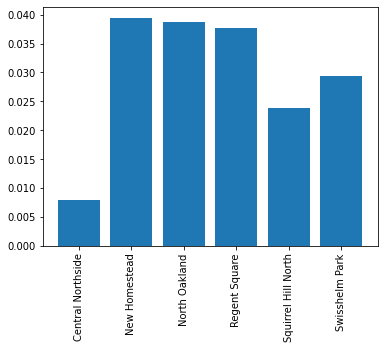

In [29]:
arrest_to_pop_ratio = dict()
top_ = dict()
for key in census_dict:
        if key in arrest_dict:
            pop = census_dict[key]
            arrests = arrest_dict[key]
            ratio = arrests/pop
            arrest_to_pop_ratio[key] = ratio
            if ratio < 0.04:
                top_[key] = ratio
#arrest_to_pop_ratio
neigh = list(top_.keys())
val = list(top_.values())
plt.bar(range(len(top_)), val, tick_label=neigh, width=.8)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.05)
plt.show()

## Conclusion
---
After counting the number of arrests in each neighborhood, I used census data from 2010 to figure out the population of each neighborhood. If the neighborhood was included in both datasets, I found the ratio between the number of arrests and the population of each neighborhood. Whichever one of these ratios was the lowest will determine which neighborhood is the best to live in. I will list the top 5 for the sole purpose of comparing to the other submetrics that my group members have, here are the top 5 neighborhoods, from best to "worst".
1. Central Northside = 0.00786862812179268
2. Squirrel Hill North = 0.023761330634515535
3. Swisshelm Park = 0.029390154298310066
4. Regent Square = 0.03771551724137931
5. North Oakland = 0.03876409818974505

## We will now move to park data from Heather
---


## Park Data

I imported Pandas to analyze the data and Matplotlib to graph it. Then, I read the CSV file and created a dictionary of all the neighborhoods, along with how many times each neighborhood appeared in the dictionary.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and create a dict
parkData = pd.read_csv("parks_in_pitt.csv", sep=",")
park_dict = dict()
for index, row in parkData.iterrows():
    neigh = row['neighborhood']
    if neigh not in park_dict:
        park_dict[neigh] = 1
    else:
        park_dict[neigh] += 1

---

The more parks in a neighborhood, the better it is. So, I sorted the dictionary in descending numerical order:

In [31]:
sorted_park_dict = sorted(park_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_park_dict)

[('East Liberty', 12), ('Central Business District', 10), ('Beechview', 8), ('South Side Slopes', 7), ('Point Breeze', 7), ('South Side Flats', 6), ('Hazelwood', 6), ('Squirrel Hill South', 6), ('Mount Washington', 6), ('Sheraden', 6), ('South Oakland', 5), ('Troy Hill', 5), ('Central Oakland', 4), ('Brighton Heights', 4), ('Elliott', 4), ('Marshall-Shadeland', 4), ('Crawford-Roberts', 3), ('North Shore', 3), ('Central Northside', 3), ('Lower Lawrenceville', 3), ('Brookline', 3), ('Lincoln-Lemington-Belmar', 3), ('Westwood', 3), ('Upper Lawrenceville', 3), ('Garfield', 3), ('Greenfield', 3), ('Larimer', 3), ('Bloomfield', 3), ('Spring Hill-City View', 3), ('Carrick', 3), ('Manchester', 3), ('Beltzhoover', 3), ('Point Breeze North', 3), ('Swisshelm Park', 3), ('Allegheny Center', 2), ('Banksville', 2), ('Homewood North', 2), ('Spring Garden', 2), ('Perry South', 2), ('Strip District', 2), ('Crafton Heights', 2), ('Allentown', 2), ('Duquesne Heights', 2), ('Fineview', 2), ('Perry North',

---

The top 5 neighborhoods are what we decided to analyze so I listed them:

In [32]:
for i, (neighborhood, park_count) in enumerate(sorted_park_dict[:5]):
    print(f"{i+1}. {neighborhood}: {park_count}")

1. East Liberty: 12
2. Central Business District: 10
3. Beechview: 8
4. South Side Slopes: 7
5. Point Breeze: 7


---

I used a bar graph to plot the data.

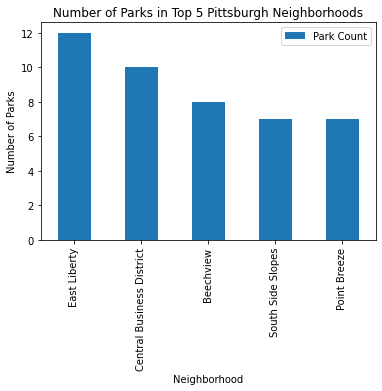

In [33]:
top_5_parks = pd.DataFrame(sorted_park_dict[:5], columns=['Neighborhood', 'Park Count'])

# Create a bar chart
top_5_parks.plot(kind='bar', x='Neighborhood', y='Park Count')

# Add chart labels
plt.title('Number of Parks in Top 5 Pittsburgh Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')

# Show the chart
plt.show()

---
## Conclusion


This metric was chosen because we concluded that there would be a positive correlation between the number of parks in a neighborhood and how "good" the neighborhood is. Since parks are community spaces, the number of them can be a good indicator of how community-oriented an area is.

I chose a data set that included all the neighborhoods in Pittsburgh and the number of parks in each. After creating a dictionary, sorting it numerically, and listing the top 5, I created a bar chart with the information.

The chart shows the top 5 best neighborhoods to live in. Based on this parameter alone, the best neighborhood in Pittsburgh is East Liberty.

## We will now conclude with Blood-lead levels from Aidan
---

To begin, I imported pandas, matplotlib and read in the csv file into a pandas dataframe.

In [34]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt

# load in the blood lead schools data file
data = pd.read_csv("blood-lead-schools.csv")

Next I initialized my schoolDistrict variable, my ebll variable, and a dict named allEblls

In [35]:
#initialize variable schoolDistrict
schoolDistrict = ""

#initialize variable ebll
ebll = 0

#initialize allEblls
allEblls = {}

Next I run a for loop and inspect each row in the dataframe, if a school has no ebll reported from 2015-2020 then there was not enough cases of students with lead in blood so these schools will all have an ebll of 0. Schools are placed into the dictionary as the key with their unique ebll assigned to them. After this, the dictionary is sorted in asscending order and is printed.

In [36]:
# for every row in the data
for index, row in data.iterrows():
    schoolDistrict = row['SchoolDistrict']
    ebll = row['percentEBLL15_20']
    if(ebll > 0):
        #print("School District: ",schoolDistrict," EBLL: ",ebll,"index: ", index)
        allEblls[schoolDistrict] = ebll
    else:
        #print("School District: ",schoolDistrict," No EBLL Found")
        allEblls[schoolDistrict] = 0
        
# sort dictionary by value of keys in asscending order
sorted_dict = dict(sorted(allEblls.items(), key=lambda x: x[1]))
print(sorted_dict)

{'Fort Cherry': 0, 'Penn-Trafford': 0, 'Pine-Richland': 0, 'Plum Borough': 0, 'Hampton Township': 0.13, 'West Jefferson Hills': 0.13, 'North Allegheny': 0.2, 'Upper St. Clair Area': 0.26, 'Mt. Lebanon': 0.37, 'South Park': 0.37, 'West Allegheny': 0.38, 'Bethel Park': 0.44, 'Deer Lakes': 0.45, 'Allegheny Valley': 0.58, 'Fox Chapel Area': 0.77, 'Montour': 0.8, 'South Fayette Township': 0.83, 'Penn Hills': 0.86, 'Keystone Oaks': 0.94, 'Moon Area': 0.95, 'Baldwin-Whitehall': 0.98, 'North Hills': 1.01, 'Avonworth': 1.02, 'Elizabeth Forward': 1.06, 'West Mifflin Area': 1.42, 'Shaler Area': 1.61, 'Quaker Valley': 1.62, 'Chartiers Valley': 1.78, 'Highlands': 1.78, 'Gateway': 1.79, 'Clairton City': 2.22, 'Riverview': 2.25, 'Steel Valley': 2.26, 'South Allegheny': 2.44, 'Cornell': 2.46, 'Brentwood Borough': 2.47, 'Sto-Rox': 2.83, 'East Allegheny': 3.09, 'Carlynton': 3.13, 'Woodland Hills': 3.53, 'City of Pittsburgh': 4.56, 'Duquesne City': 4.88, 'Northgate': 5.57, 'Wilkinsburg': 6.08, 'McKeespor

Finaly I extracted all of the keys and values from the dict and mapped them on a bar graph using matplotlib.

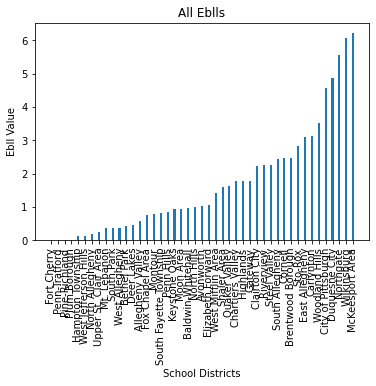

In [37]:
# extract keys and values from the dictionary
keys = list(sorted_dict.keys())
values = list(sorted_dict.values())

# create a bar chart using the keys and values
plt.bar(keys, values, width=0.3)
plt.xticks(rotation=90)


# Set chart title and axis labels
plt.title("All Eblls")
plt.xlabel("School Districts")
plt.ylabel("Ebll Value")

# Display the chart
plt.show()

### Conclusion:

Fort Cherry, Penn-Trafford, Pine-Richland, and Plum Borough all had an EBLL of 0, meaning they would be the most optimal school districts to send children. Hampton Township and West Jefferson Hills both have reported EBLL of below 0.2 %, which is exceptional as well. As you get closer to Downtown/Mckeesport Area the EBLL % increases drastically. All in all, Fort Cherry, Penn-Trafford, Pine-Richland, Plum Borough, Hampton Township and West Jefferson Hills are all exceptionally safe school districts to send your children too, in terms of how much lead will be in their blood as a result of their schooling.

## Final Conclusion
---

Soooo, our results were kind of inconclusive, with none of our top five's overlapping. But, if we did have to choose a neighborhood, we decided on Squirrel Hill. Squirrel Hill was in the top of the arrest data and it was just outside of the top five for the park data, we decided that the arrest data had the most weight in our decision, which led to our overall pick of Squirrel Hill.